In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


Index([], dtype='object')


Data Visualisation

<Axes: xlabel='Outcome', ylabel='count'>

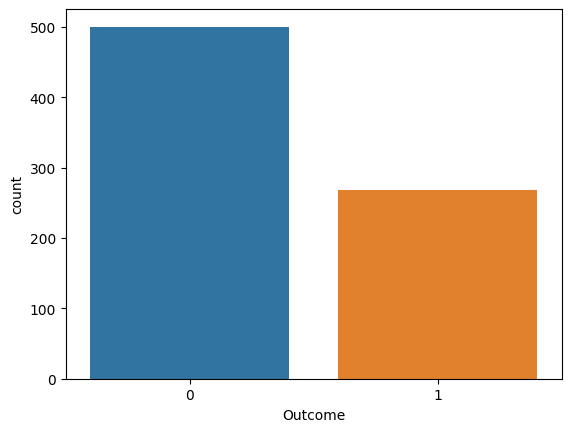

In [6]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

In [7]:
# Count the number of diabetic (labeled as 1) and non-diabetic (labeled as 0) individuals
num_diabetic = df['Outcome'].value_counts()[1]
num_non_diabetic = df['Outcome'].value_counts()[0]

print("Number of diabetic individuals:", num_diabetic)
print("Number of non-diabetic individuals:", num_non_diabetic)


Number of diabetic individuals: 268
Number of non-diabetic individuals: 500


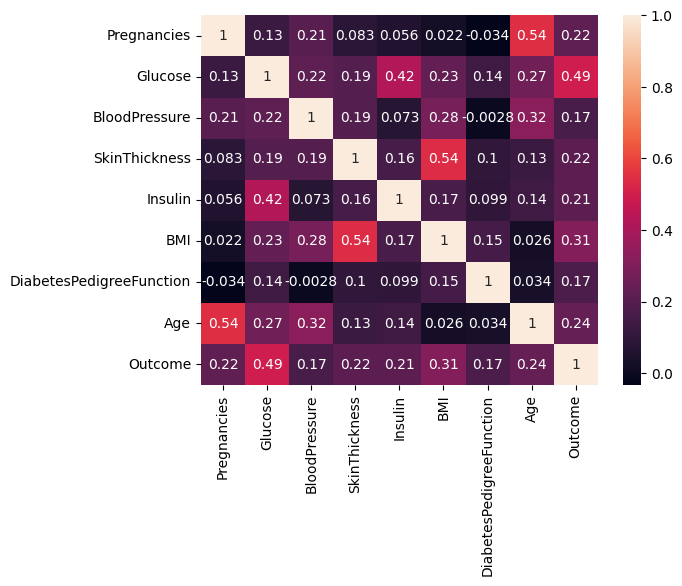

In [15]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

Data Preprocessing

In [8]:
# Replacing zero values with NaN

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
# Count of NaN
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# Replacing NaN with mean values
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())


In [12]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(df)
dataset_scaled = pd.DataFrame(dataset_scaled)

In [13]:
dataset_scaled = pd.DataFrame(dataset_scaled)


In [16]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [18]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df['Outcome'] )


In [19]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


Data Modelling

In [20]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)


LogisticRegression(random_state=42)

In [21]:
Y_pred_logreg = logreg.predict(X_test)


In [22]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=24)

In [24]:
Y_pred_knn = knn.predict(X_test)

In [26]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
randFor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
randFor.fit(X_train, Y_train)
Y_pred_randFor = ranfor.predict(X_test)


RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [27]:
Y_pred_randFor = ranfor.predict(X_test)


Model Evaluation

In [29]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_randFor = accuracy_score(Y_test, Y_pred_randFor)

In [30]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Random Forest: " + str(accuracy_randFor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Random Forest: 75.97402597402598


<Axes: >

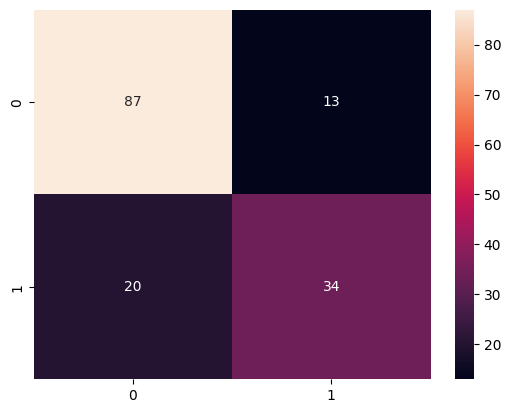

In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)